## Descripción del proyecto
Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
Crear un modelo para predecir el volumen de reservas en pozos nuevos.
Elegir los pozos petrolíferos que tienen los valores estimados más altos.
Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.
Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

## Condiciones:
Solo se debe usar la regresión lineal para el entrenamiento del modelo.
Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.
Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

## Descripción de datos
Los datos de exploración geológica de las tres regiones se almacenan en archivos:

/datasets/geo_data_0.csv. Descarga el conjunto de datos
/datasets/geo_data_1.csv. Descarga el conjunto de datos
/datasets/geo_data_2.csv. Descarga el conjunto de datos

    id — identificador único de pozo de petróleo
    f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)
    product — volumen de reservas en el pozo de petróleo (miles de barriles).

In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy.random import RandomState

In [3]:
# Extraemos los DF a utilizar.
region_0 = pd.read_csv('../source/geo_data_0.csv')
region_1 = pd.read_csv('../source/geo_data_1.csv')
region_2 = pd.read_csv('../source/geo_data_2.csv')

In [4]:
#Analizamos mi df region_0
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
#Analizamos si existen valores duplicados en el Df general y en el Id.
print('Df region_0')
print(region_0.duplicated().sum())
print('Df regiom_0 a nivel de ID')
print(region_0['id'].duplicated().sum())

Df region_0
0
Df regiom_0 a nivel de ID
10


In [6]:
# Procedo a eliminar los 10 ID duplicados.
region_0 = region_0.drop_duplicates(subset='id')
# Volvemos a revisar los duplicados para veriicar que se hayan eliminado.
print(region_0['id'].duplicated().sum())

0


array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

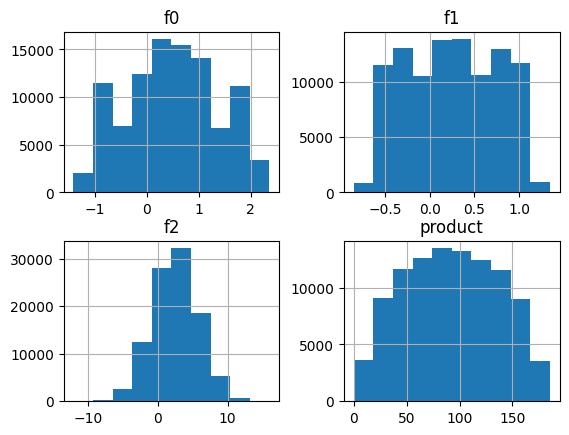

In [7]:
# Procemos a validar la distribucion de los datos a travez de un grafico.
region_0.hist()

In [9]:
# Analizamos mi DF region_1
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
#Validamos si hay valores duplicados a nivel general.
#Validamos si hay valores duplicados a nivel de ID
print('Df region_1')
print(region_1.duplicated().sum())
print('Df region_1 a nivel de ID')
print(region_1['id'].duplicated().sum())

Df region_1
0
Df region_1 a nivel de ID
4


In [11]:
# Procedo a eliminar los 10 ID duplicados.
region_1 = region_1.drop_duplicates(subset='id')
# Volvemos a revisar los duplicados para veriicar que se hayan eliminado.
print(region_1['id'].duplicated().sum())

0


array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

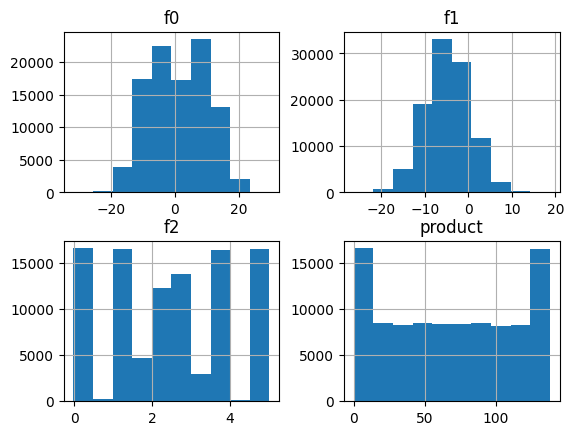

In [12]:
# Procemos a validar la distribucion de los datos a travez de un grafico.
region_1.hist()

In [13]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [14]:
#Validamos si hay valores duplicados a nivel general.
#Validamos si hay valores duplicados a nivel de ID
print('Df region_2')
print(region_2.duplicated().sum())
print('Df region_2 a nivel de ID')
print(region_2['id'].duplicated().sum())

Df region_2
0
Df region_2 a nivel de ID
4


In [15]:
# Procedo a eliminar los 10 ID duplicados.
region_2 = region_2.drop_duplicates(subset='id')
# Volvemos a revisar los duplicados para veriicar que se hayan eliminado.
print(region_2['id'].duplicated().sum())

0


array([[<Axes: title={'center': 'f0'}>, <Axes: title={'center': 'f1'}>],
       [<Axes: title={'center': 'f2'}>,
        <Axes: title={'center': 'product'}>]], dtype=object)

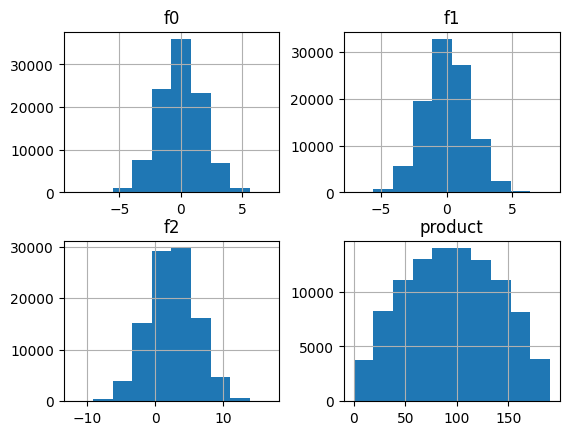

In [16]:
region_2.hist()

In [ ]:
# Creamos una funcion.
def regresion_lineal_model(feature, target):
    #Dividimos conjunto de entrenamiento y validacion 75:25
    feature_train, feature_valid, target_train, target_valid = train_test_split(feature, target, random_state=123, test_size=0.25)
    
    # Aplicamos y ajustamos el modelo con los datos de entrenamiento
    modelo = LinearRegression()
    modelo.fit(feature_train, target_train)
    
    # Predecimos el modelo con los datos de validacion y pasamos a series para un mejor trabajo.
    modelo_predict = modelo.predict(feature_valid)
    predict = pd.Series(modelo_predict)
    
    # Volumen medio de reservas predicho.
    volumen_mean = predict.mean()
    
    #Volumen real de reservas.
    volumen_real = target_valid.mean()
    
    #RMSE del modelo.
    mse = mean_squared_error(target_valid, modelo_predict)
    RMSE = mse ** 0.5
    
    print('Volúmen medio verdadero de reservas en la región:', volumen_real),
    print('Volúmen medio de reservas predicho por el modelo:', volumen_mean),
    print('RMSE del modelo:', RMSE)

    return predict, volumen_mean, RMSE